### Imports

In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamNeedle
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import integrate

Welcome to JupyROOT 6.29/01


### Date and prefix

In [2]:
date = "2023_08_21"
save_name_prefix = "plots/BeamNeedle/" + date + "_T20_plot"

# Numerical convolutions and integral

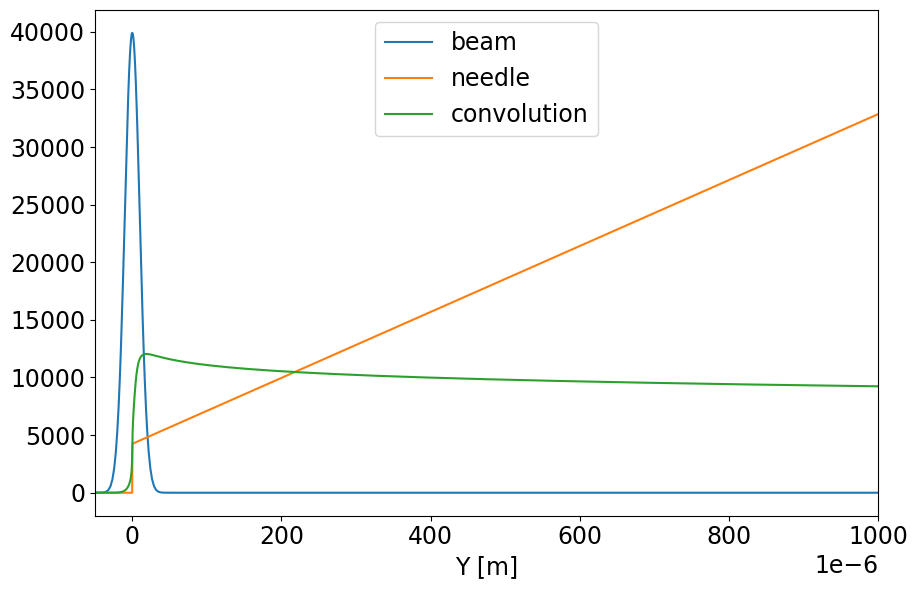

In [3]:
beamNeedle.PlotConvolutionExampleNeedle(a=1, c=1e2, A=1e1, sigma=10e-6, R1=7e-6, R2=125e-6, length=2.5e-3)
_plt.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
_plt.xlim(-5e-5,1e-3)
_plt.xlabel("Y [m]")
_plt.savefig("{}_convolution_example_needle".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

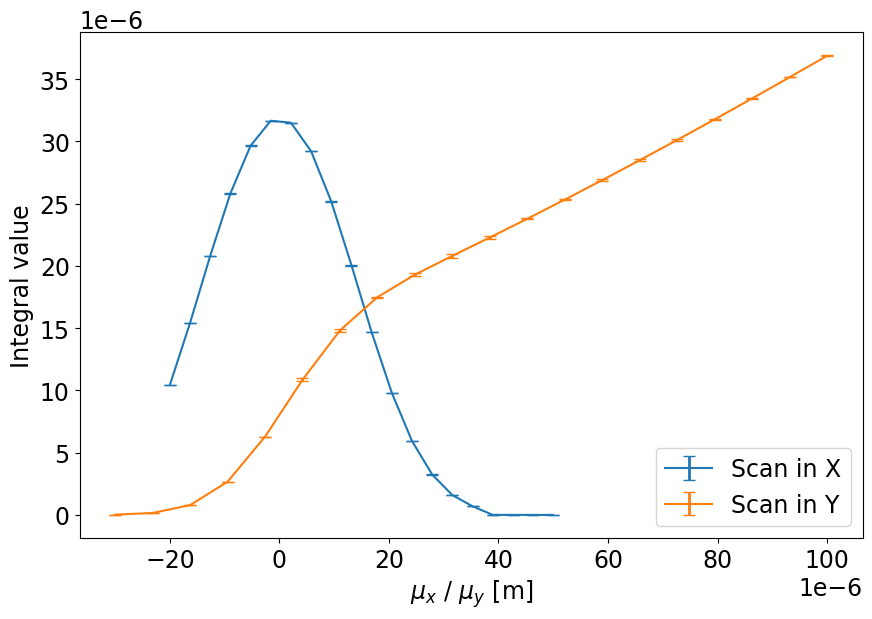

In [4]:
beamNeedle.plotOptions()

beamNeedle.plot_numerical_needle_scan(param='mux', scan_min=-20e-6, scan_max=50e-6, 
                                    a=1, b=5e-1, muy=2e-4, sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=20, color="C0", label='Scan in X')
beamNeedle.plot_numerical_needle_scan(param='muy', scan_min=-30e-6, scan_max=100e-6, 
                                    sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=20, color="C1", label='Scan in Y')
#beamNeedle.plot_numerical_needle_scan(param='muy', scan_min=35e-6, scan_max=1000e-6, 
#                                    sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=50, color="C1", label='Scan in Y')
#beamNeedle.plot_numerical_needle_scan(param='muy', scan_min=24e-6, scan_max=35e-6, 
#                                    sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=20, color="C1", label='Scan in Y')

_plt.xlabel(r'$\mu_x$ / $\mu_y$ [m]')
_plt.ticklabel_format(axis='both', style='sci', scilimits=(-6,-6))
_plt.savefig("{}_x_y_needle_scan_using_integral".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

# Needle geometry

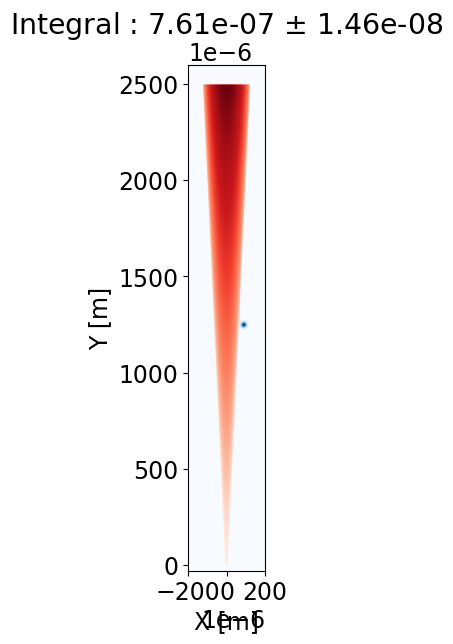

In [8]:
beamNeedle.plotOptions()

beamNeedle.plot_gauss_needle_integral(sigmax=10e-6, sigmay=10e-6, mux=90e-6, muy=1.25e-3, length=2.5e-3, R1=125e-6, R2=7e-6, 
                                    xmin=-200e-6, xmax=200e-6, ymin=-30e-6, ymax=2.6e-3, nbins = 1000)

_plt.ticklabel_format(axis='both', style='sci', scilimits=(-6,-6))
_plt.savefig("{}_integral_plot_needle_and_beam".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

# Create gmad files sets

In [9]:
#beamNeedle.GenerateSetGmadFiles(tag="T20_wire_fullline", wireOffsetX='+1.00')

In [10]:
#beamNeedle.GenerateSetGmadFiles(tag="T20_needle", needleOffsetX='+0.00e-5', needleOffsetY='+0.00e-3',
#                                alfx=0.523492, alfy=-5.374594, betx=1.219804, bety=28.061506, 
#                                dispx=0.144685, dispxp=-0.039822, dispy=-0.004589, dispyp=-0.002385,
#                                sigmaE=1.377e-5, line='l7')

In [11]:
#beamNeedle.GenerateAllGmadFilesAndList(tag="T20_needle", valuetoscan='needleOffsetY', 
#                                       valuelist=beamWire.GenerateLinearListValuesStr(minValue=-1.5, maxValue=0, nbpts=31, nbDecimals=2, exponant=-3), 
#                                       xsecfact='1e0', needleOffsetX='+0.00e-5',
#                                       alfx=0.523492, alfy=-5.374594, betx=1.219804, bety=28.061506, 
#                                       dispx=0.144685, dispxp=-0.039822, dispy=-0.004589, dispyp=-0.002385,
#                                       sigmaE=1.377e-5, line='l7')

# BDSIM run and Python analysis

In [25]:
#beamNeedle.runOneOffset("../03_bdsimModel/T20_needle_X_+0.00e-5_Y_+0.00e-3.gmad", npart=20000, seed=None, silent=False)
#beamNeedle.runOneOffset("../03_bdsimModel/TEST_T20_wire_offset_+0.00_bias_1e0.gmad", npart=10000, seed=0, silent=False)
beamNeedle.analysis("../04_dataLocal/20000_part_T20_needle_X_+0.00e-5_Y_+0.00e-3.root")

BDSIM output file - using DataLoader
File : ../04_dataLocal/20000_part_T20_needle_X_+0.00e-5_Y_+0.00e-3.root  / Nb of entries =  20000


In [23]:
beamNeedle.runScanOffset(tagfilelist="tagfilelistneedle", npart=20000, seed=None, silent=True)

Run BDSIM on file ../03_bdsimModel/T20_needle_X_+0.00e-5_Y_+0.00e-3.gmad with 20000 particles: |██████████████████████████████████████████████████| 100.0% Complete
Succesfull BDSIM run for 31 files with 20000 particles


In [24]:
#beamNeedle.analysis(_gl.glob('../04_dataLocal/10000_part_T20_wire_offset_[-+]0.[0-1][0-9][0-9]_bias_1e0.root'))
beamNeedle.analysis(_gl.glob('../04_dataLocal/20000_part_T20_needle_X_+0.00e-5*.root'))

Run REBDSIM analysis on file ../04_dataLocal/20000_part_T20_needle_X_+0.00e-5_Y_-0.85e-3.root: |██████████████████████████████████████████████████| 100.0% Complete
Succesfull REBDSIM analysis for 31 files


0

Warning in <TClass::Init>: no dictionary for class BDSOutputROOTEventHeader is available


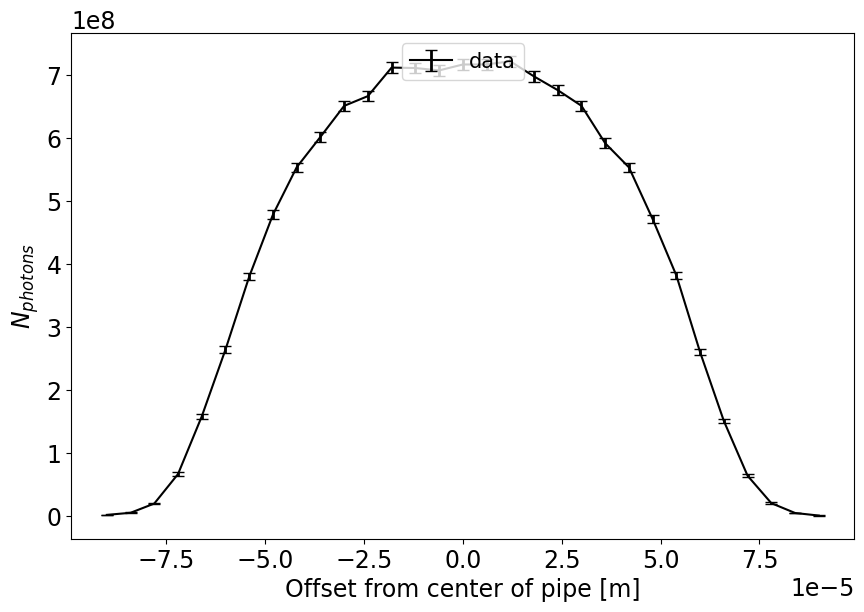

In [3]:
beamNeedle.PlotIntegralNeedle('../06_analysis/20000_part_T20_needle_*Y_+0.00e-3_hist.root', 'PHOTONS_R', 'X', 
                              a=None, sigmax=10e-6, sigmay=10e-6, mux=0, muy=0, b=None, length=1e-3, R1=7e-6, R2=125e-6,
                              manualFit=False, autoFit=False, autoFitFixed=False, linFit=False, fitRange=[-_np.inf, _np.inf])

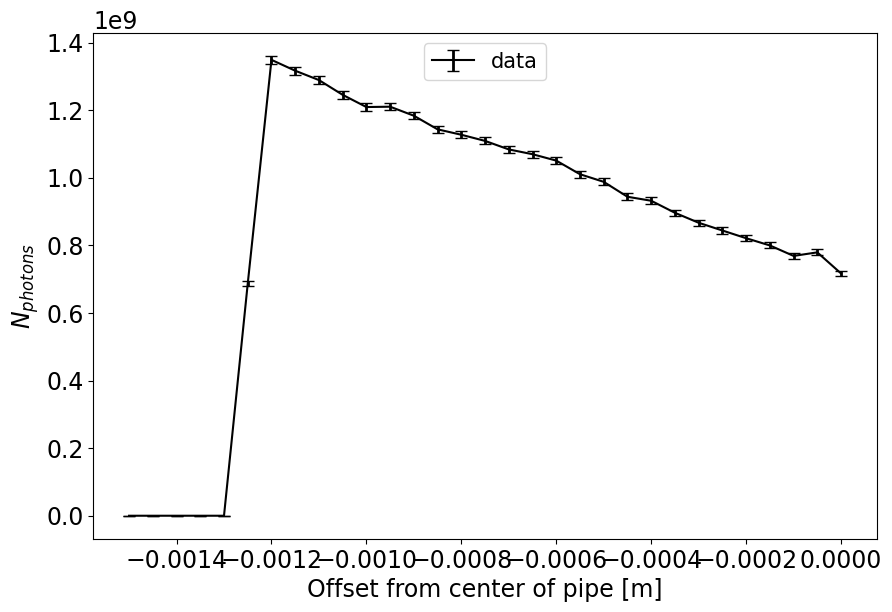

In [4]:
beamNeedle.PlotIntegralNeedle('../06_analysis/20000_part_T20_needle_X_+0.00e-5*_hist.root', 'PHOTONS_R', 'Y', 
                              a=None, sigmax=10e-6, sigmay=10e-6, mux=0, muy=0, b=None, length=1e-3, R1=7e-6, R2=125e-6,
                              manualFit=False, autoFit=False, autoFitFixed=False, linFit=False, fitRange=[-_np.inf, _np.inf])

In [12]:
#_gl.glob('../04_dataLocal/20000_part_T20_needle_*_Y_+0.00e-3.root')

In [13]:
#beamNeedle.GenerateLinearListValuesStr(minValue=-1.5, maxValue=0, nbpts=31, nbDecimals=2, exponant=-3)